<a href="https://colab.research.google.com/github/Emio-eng/study-graphics-colab/blob/main/Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

#plotar grafico

data="https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"
df= pd.read_csv(data, index_col = "data", parse_dates= True)

#VER5 entradas
df.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


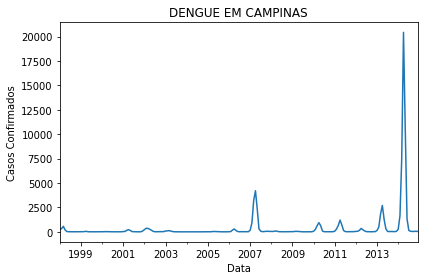

In [ ]:
#plotar grafico de linhas com a quantidade de casos confirmados

fig, ax = plt.subplots()

df["casos-confirmados"].plot(kind = "line", ax=ax)
ax.set_title("DENGUE EM CAMPINAS")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel("Data")

plt.tight_layout()



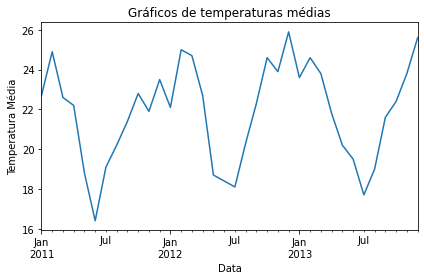

In [ ]:
#plotar com intervalos

fig, ax = plt.subplots()
df.loc['2011-01-01' : '2013-12-31', "temperatura-media"].plot(kind="line", ax=ax)

ax.set_title("Gráficos de temperaturas médias")
ax.set_ylabel("Temperatura Média")
ax.set_xlabel("Data")

plt.tight_layout()

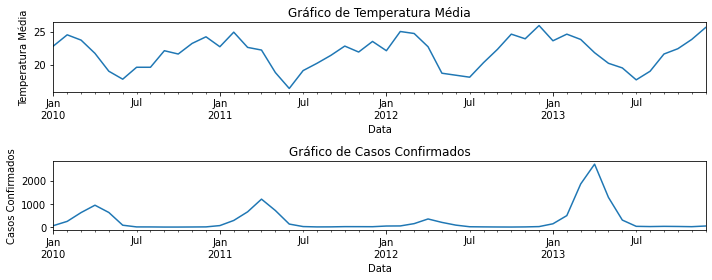

In [ ]:
#plotar multiplos graficos separadamente

fig,(ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,4))

df.loc['2010-01-01':'2013-12-31',"temperatura-media"].plot(kind="line", ax=ax1)
ax1.set_title("Gráfico de Temperatura Média")
ax1.set_ylabel("Temperatura Média")
ax1.set_xlabel("Data")

#plotar os casos confirmados
df.loc['2010-01-01':'2013-12-31', "casos-confirmados"].plot(kind="line", ax=ax2)
ax2.set_title("Gráfico de Casos Confirmados")
ax2.set_ylabel("Casos Confirmados")
ax2.set_xlabel("Data")

plt.tight_layout()




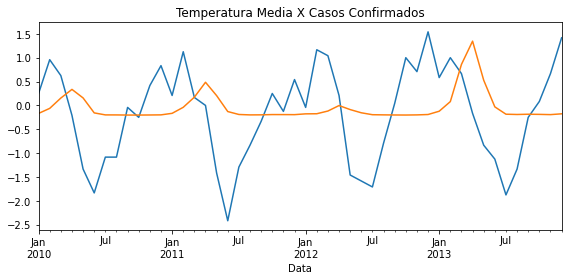

In [ ]:
###Plotar multiplos gráficos subpostos

#normalização

df_norm = (df-df.mean())/df.std()
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8,4))

#plotar temperatura media
df_norm.loc['2010-01-01':'2013-12-31',"temperatura-media"].plot(kind="line", ax=ax)

#plotar os casos confirmados

df_norm.loc['2010-01-01':'2013-12-31', "casos-confirmados"].plot(kind="line", ax=ax)

ax.set_title("Temperatura Media X Casos Confirmados")
ax.set_xlabel("Data")

plt.tight_layout()

In [ ]:
#Heatmap

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#importar dataframe

#visualizacao das 5 primeiras linhas

Correlação

In [ ]:
#criando matriz de correlação

df_corr = df.corr()
df_corr

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
casos-confirmados,1.000000,-0.083691,0.041172,0.037013,0.026151
chuva,-0.083691,1.000000,0.492732,0.487643,0.393733
temperatura-media,0.041172,0.492732,1.000000,0.885326,0.893091
temperatura-mininima,0.037013,0.487643,0.885326,1.000000,0.685034
temperatura-maxima,0.026151,0.393733,0.893091,0.685034,1.000000


## Plotar HeatMap


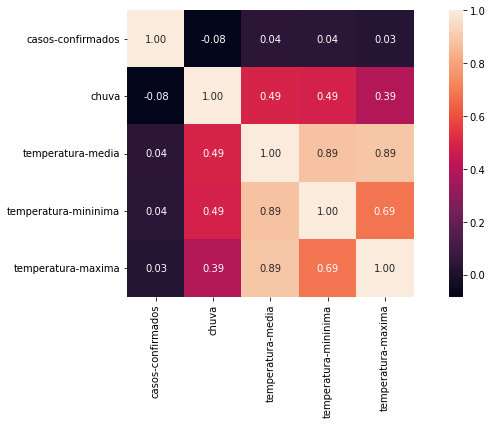

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(df_corr,fmt='.2f', square = True, linecolor = 'white', vmax=1.0, annot=True)

plt.tight_layout()

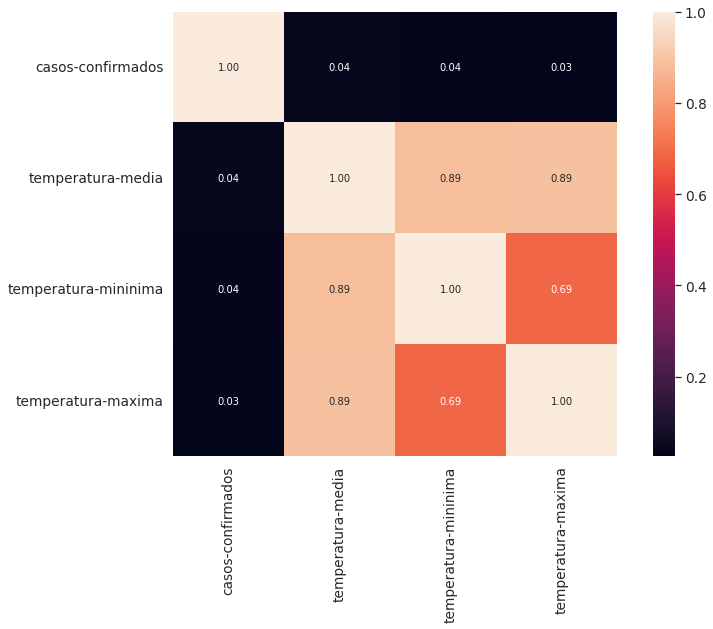

In [ ]:
k = 4

#encontrar as variaveis mais correlacionadas

cols = df_corr.nlargest(k,'casos-confirmados')['casos-confirmados'].index
cm = np.corrcoef(df[cols].values.T)

#plotar o heatmap

fig, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True,annot=True,square=True,fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

##Histograma


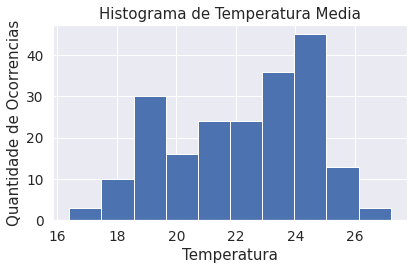

In [ ]:
#plotando histograma

fig, ax = plt.subplots()

ax.hist('temperatura-media',data=df)
ax.set_title("Histograma de Temperatura Media")
ax.set_ylabel("Quantidade de Ocorrencias")
ax.set_xlabel("Temperatura")

plt.tight_layout()

##Boxplot

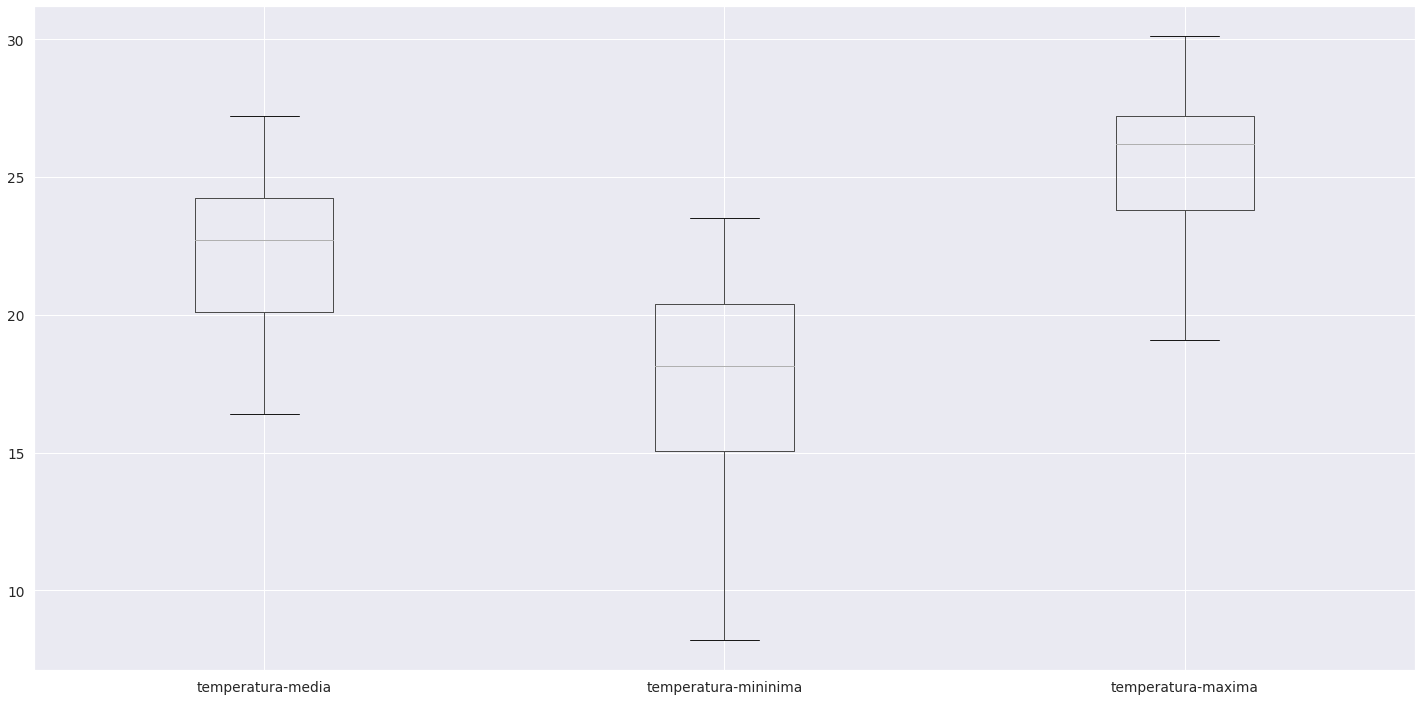

In [ ]:
#plotar Boxplot das temperaturas

fig, ax = plt.subplots(figsize=(20,10))

df.boxplot(['temperatura-media','temperatura-mininima','temperatura-maxima'], ax=ax)

plt.tight_layout()

##Gráfico de Violino

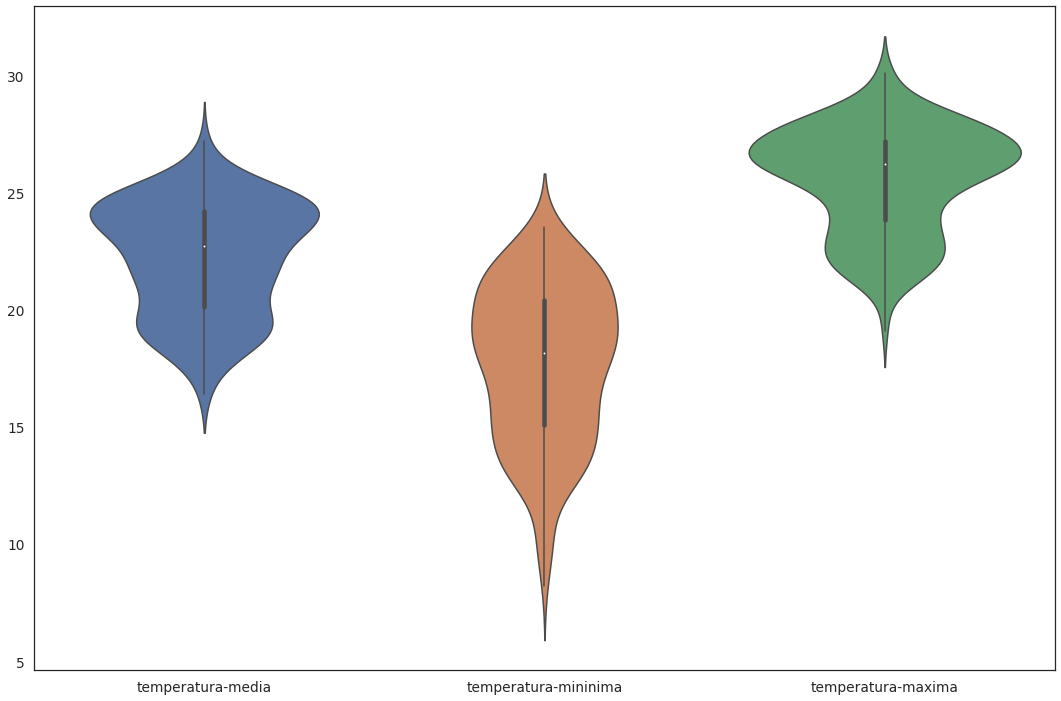

In [ ]:
#plotar grafico de violino
sns.set_style('white')

fig, ax = plt.subplots(figsize=(15,10))

del df['casos-confirmados']
del df['chuva']

sns.violinplot(data=df, ax=ax)

plt.tight_layout()

##Grafico de waffle

In [ ]:
#instalar biblioteca pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 26.2 MB 1.6 MB/s 


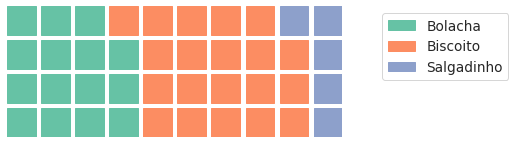

In [ ]:
from pywaffle import Waffle

fig = plt.figure(FigureClass = Waffle,
                 rows = 4,
                 columns = 10,
                 values={'Bolacha':45,
                         'Biscoito': 63,
                         'Salgadinho' : 15},
                 legend={'loc':'upper left','bbox_to_anchor':(1.1,1)})
fig.set_tight_layout(False)
plt.show()

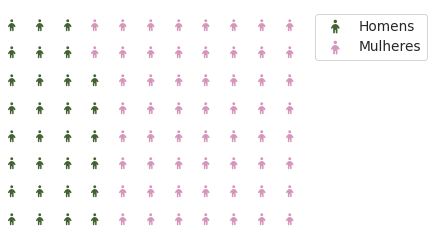

In [ ]:
fig = plt.figure(
    FigureClass=Waffle,
    rows = 8,
    values = {'Homens':30,'Mulheres':58},
    colors=("#426232","#d696bb"),
    legend={'loc':'upper left','bbox_to_anchor':(1,1)},
    icons= 'child',icon_size=12,
    icon_legend = True
)

fig.set_tight_layout(False)
plt.show()